# Forecast the CO2 emissions for the next 10 Years

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as pyplot
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
df = pd.read_excel("C:/Users/Ashraf/Downloads/files/CO2 dataset.xlsx")

In [3]:
df.head()

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542


Inference: This is our original dataset.

In [4]:
df.shape

(215, 2)

Inference: The dataset consist of 215 rows and 2 columns. This meqn there is only one Yt variable corresponding to its time(t) variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [6]:
df.isnull().sum()

Year    0
CO2     0
dtype: int64

Inference: No Na values present

In [7]:
# Checking the data types of columns/variable
df.dtypes

Year    float64
CO2     float64
dtype: object

Inference: The "Year" columns i.e our t variable is of float64 dtype, it should be of datetime dtype, so now we will convert it to datetime

In [8]:
# Converting "Year" column (Yt variable) to datetime
df['Year'] = pd.to_datetime(df['Year'],format='%Y')
df.dtypes

Year    datetime64[ns]
CO2            float64
dtype: object

Inference: Now "Year" column i.e t variable is converted to datetime. So mostly EDA is Done we can Now Move to Descriptive Stats & Visualization Part.

In [9]:
#Date Ranges
print("Minimum Date is :",min(df['Year']))
print("Maximum Date is :",max(df['Year']))

Minimum Date is : 1800-01-01 00:00:00
Maximum Date is : 2014-01-01 00:00:00


## Forecasting - Visualization

In [10]:
#Converting the Year Column into Index For Visualization
df2=df.set_index(['Year'])
df2.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542



### Line Plot

<Figure size 864x216 with 0 Axes>

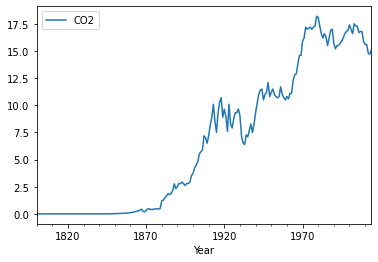

In [11]:
plt.figure(figsize=(12,3))
df2.plot()
plt.show()

### Histogram and Density Plots

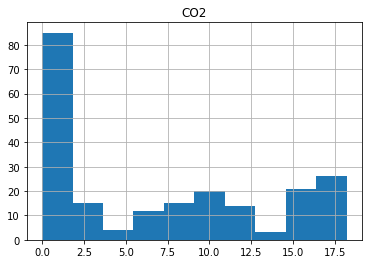

In [12]:
df2.hist()
plt.show()

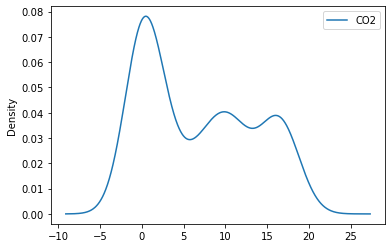

In [13]:
# density plot
df2.plot(kind='kde')
plt.show()

## Lag plot

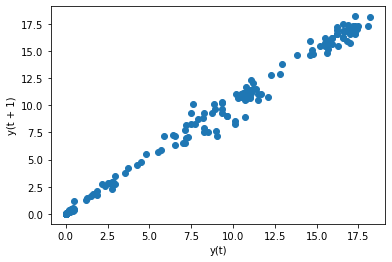

In [14]:
# create a scatter plot / lag plot
from pandas.plotting import lag_plot

#Plotting
lag_plot(df2)
plt.show()

Inference: There is a Linear Relationship between the Y(t) & Y(t + 1) Variable

### ACF Plot

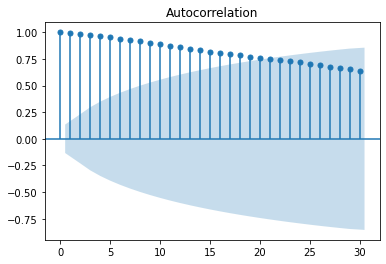

In [15]:
# create autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
#Plotting
plot_acf(df2,lags=30)
plt.show()

Inference: This is An Autocorrelation Plot, here we can see the standard Error(SE) ranges from -0.75 to 0.75.

The lag variable which are above the standard error range then those variables are statistically significant

So in Our case the all the lagged variable are significant except the last four lagged Variable

# Box and Whisker Plots

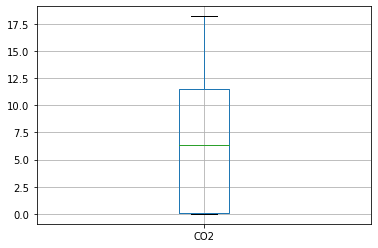

In [16]:
df2.boxplot()
plt.show()

Inference: No Extreme value present in my dataset

# Time series decomposition plot

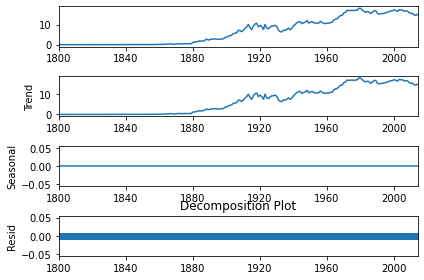

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df2)
decompose.plot()
plt.title("Decomposition Plot")
plt.show()

Inference: Now We can say its Confirm there is no Seasonality only Trend

We Can Visualize it is a Exponential Trend & No Seasonality.

## Forecasting_Model based methods

In [18]:
# Creating t & t2 Variable
df3 = df2.copy()
df3 ["t"] = np.arange(1,216)
df3["t_sq"] = df3["t"]*df3["t"]
df3["log_CO2"] = np.log(df3['CO2'])
df3.head()

,CO2,t,t_sq,log_CO2
Year,,,,
1800-01-01,0.00568,1,1,-5.170804
1801-01-01,0.00561,2,4,-5.183205
1802-01-01,0.00555,3,9,-5.193957
1803-01-01,0.00548,4,16,-5.206650
1804-01-01,0.00542,5,25,-5.217659


### Transformation
Transforming the TimeSeries to get the Trend Reduce & get Normal Distribution

In [19]:
#Transformation
import scipy.stats as stats
from scipy.stats import boxcox 

In [20]:
#Log Transformation
Log_ = pd.DataFrame(df3.iloc[:,1:3])
Log_['CO2']=np.log(df3['CO2'])
Log_['log_CO2']=np.log(Log_['CO2'])
#Reciprocal Transformation
Reci = pd.DataFrame(df3.iloc[:,1:3])
Reci['CO2']=1/(df3['CO2'])
Reci['log_CO2']=np.log(Reci['CO2'])
#Square Root Transformation
Sqrt_ = pd.DataFrame(df3.iloc[:,1:3])
Sqrt_['CO2']=np.sqrt(df3['CO2'])
Sqrt_['log_CO2']=np.log(Sqrt_['CO2'])
#Box-cox Transformation
Box = pd.DataFrame(df3.iloc[:,1:3])
Box['CO2'], param = stats.boxcox(df3.CO2)
Box['log_CO2']=np.log(Box['CO2'])

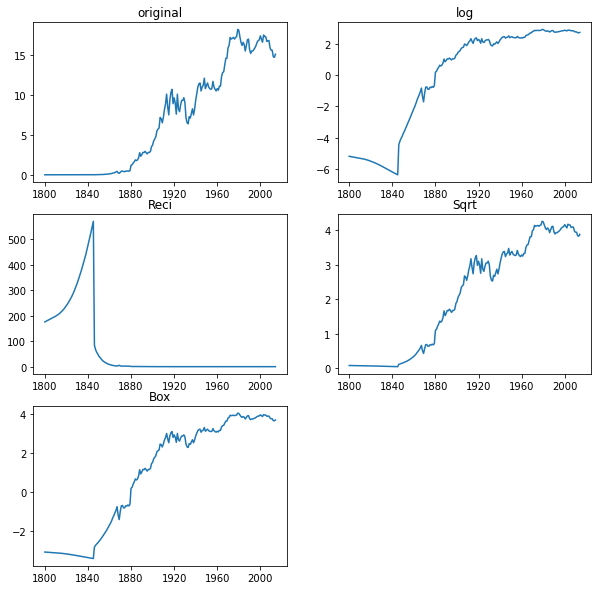

In [21]:
#Ploting the transformed data
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.plot(df3.CO2)
plt.title("original")

plt.subplot(322)
plt.plot(Log_.CO2)
plt.title("log")

plt.subplot(323)
plt.plot(Reci.CO2)
plt.title("Reci")

plt.subplot(324)
plt.plot(Sqrt_.CO2)
plt.title("Sqrt")

plt.subplot(325)
plt.plot(Box.CO2)
plt.title("Box")
plt.show()

Inference: From the the Line plot for all the Transformation, we can still see Trend to be present,any transformation made no difference.

So for best practice will make models on all transform data and checks which model gives least error

## Data Partition
Train - 80% , Test - 20%

In [22]:
#For Original Data
Ori_train = df3.iloc[:,:4].head(172)
Ori_test = df3.iloc[:,:4].tail(43)
#For Log Data
Log_train = Log_.iloc[:,:4].head(172)
Log_test = Log_.iloc[:,:4].tail(43)
#For Reci Data
Reci_train = Reci.iloc[:,:4].head(172)
Reci_test = Reci.iloc[:,:4].tail(43)
#For Sqrt Data
Sqrt_train = Sqrt_.iloc[:,:4].head(172)
Sqrt_test = Sqrt_.iloc[:,:4].tail(43)
#For Box Data
Box_train = Box.iloc[:,:4].head(172)
Box_test = Box.iloc[:,:4].tail(43)

## Forecasting - Model Based Methods

### Linear Model

In [23]:
import statsmodels.formula.api as smf 

# Linear Model

def liner_model(train,test):
    linear_model = smf.ols('CO2~t',data=train).fit()
    pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
    result = np.mean(np.abs((pred_linear-test.CO2)/test.CO2)*100)
    return result
#Calling Function for all Data 
mape_olm = liner_model(Ori_train,Ori_test)
mape_llm = liner_model(Log_train,Log_test)
mape_rlm = liner_model(Reci_train,Reci_test)
mape_slm = liner_model(Sqrt_train,Sqrt_test)
mape_blm = liner_model(Box_train,Box_test)
#Final Result DataFrame
Linear_result_grid = {'Model':['Linear Model'],'Ori_MAPE':[mape_olm],'Log_MAPE':[mape_llm],'Reci_MAPE':[mape_rlm],'Sqrt_MAPE':[mape_slm],'Box_MAPE':[mape_blm]}
Result_df = pd.DataFrame(Linear_result_grid)
Result_df

,Model,Ori_MAPE,Log_MAPE,Reci_MAPE,Sqrt_MAPE,Box_MAPE
0,Linear Model,16.48392,108.404518,204300.419266,10.79555,46.136285


## Exponential

In [24]:
#Exponential
def Exp_model(train,test):
    Exp = smf.ols('log_CO2~t',data=train).fit()
    pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
    result = np.mean(np.abs((pred_Exp-test.CO2)/test.CO2)*100)
    return result
#Calling Function for all Data 
mape_oem = Exp_model(Ori_train,Ori_test)
mape_lem = Exp_model(Log_train,Log_test)
mape_rem = Exp_model(Reci_train,Reci_test)
mape_sem = Exp_model(Sqrt_train,Sqrt_test)
mape_bem = Exp_model(Box_train,Box_test)
#Final Result Grid
Exp_result_grid = ['Exponential Model', mape_oem, mape_lem, mape_rem, mape_sem, mape_bem]
Result_df.loc[len(Result_df.index)] = Exp_result_grid 
Result_df

,Model,Ori_MAPE,Log_MAPE,Reci_MAPE,Sqrt_MAPE,Box_MAPE
0,Linear Model,16.483920,108.404518,204300.419266,10.795550,46.136285
1,Exponential Model,64.469798,42.807310,9700.050232,28.047605,48.548968


## Quadratic

In [25]:
#Quadratic 
def Quad_model(train,test):
    Quad = smf.ols('CO2~t+t_sq',data=train).fit()
    pred_Quad = pd.Series(Quad.predict(test[["t","t_sq"]]))
    result = np.mean(np.abs((pred_Quad-test.CO2)/test.CO2)*100)
    return result
#Calling Function for all Data 
mape_oqm = Quad_model(Ori_train,Ori_test)
mape_lqm = Quad_model(Log_train,Log_test)
mape_rqm = Quad_model(Reci_train,Reci_test)
mape_sqm = Quad_model(Sqrt_train,Sqrt_test)
mape_bqm = Quad_model(Box_train,Box_test)
#Final Result Grid
Quad_result_grid = ['Quadratic Model', mape_oqm, mape_lqm, mape_rqm, mape_sqm, mape_bqm]
Result_df.loc[len(Result_df.index)] = Quad_result_grid 
Result_df

,Model,Ori_MAPE,Log_MAPE,Reci_MAPE,Sqrt_MAPE,Box_MAPE
0,Linear Model,16.483920,108.404518,204300.419266,10.795550,46.136285
1,Exponential Model,64.469798,42.807310,9700.050232,28.047605,48.548968
2,Quadratic Model,23.150158,18.788091,52980.627821,24.870353,33.364613


Inference: Cannot Built "Additive, Multiplicative Seasonality Model" as no sign of Seasonality is present.

So we stop the Model Based Methods

So Far,The Best Model from Model Based Methods is Linear Model with Sqrt Root Transformation which gave Least MAPE = 10.795550

## Data Driven Models
### Test Stationary
Naive test for stationary by checking constant mean and variance

In [26]:
#Checking For Stationary data
X = df3.CO2.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.888644, mean2=12.650000
variance1=2.399437, variance2=13.176064


Since mean and variance changes drastically it is evident that out data is not stationary.

So will Use "Moving Average" to Make the Data Stationary, But First Let Create a BenchMark "Naive" Model

## Naive / Baseline Model

In [27]:
#Naive / Baseline Model
def Naive_model(train,test):
    Naive = np.asarray(train.CO2)[len(np.asarray(train.CO2))-1]
    result = np.mean(np.abs((Naive-test.CO2)/test.CO2)*100)
    return result
#Calling Function for all Data 
mape_onm = Naive_model(Ori_train,Ori_test)
mape_lnm = Naive_model(Log_train,Log_test)
mape_rnm = Naive_model(Reci_train,Reci_test)
mape_snm = Naive_model(Sqrt_train,Sqrt_test)
mape_bnm = Naive_model(Box_train,Box_test)
#Final Result Grid
Naive_result_grid = ['Naive Model', mape_onm, mape_lnm, mape_rnm, mape_snm, mape_bnm]
Result_df.loc[len(Result_df.index)] = Naive_result_grid 
Result_df

,Model,Ori_MAPE,Log_MAPE,Reci_MAPE,Sqrt_MAPE,Box_MAPE
0,Linear Model,16.483920,108.404518,204300.419266,10.795550,46.136285
1,Exponential Model,64.469798,42.807310,9700.050232,28.047605,48.548968
2,Quadratic Model,23.150158,18.788091,52980.627821,24.870353,33.364613
3,Naive Model,4.649507,1.675075,4.766006,2.337979,2.237067


In [28]:
#Simple Average 
def savg_model(train,test):
    Savg = train['CO2'].mean()
    result = np.mean(np.abs((Savg-test.CO2)/test.CO2)*100)
    return result
#Calling Function for all Data 
mape_osam = savg_model(Ori_train,Ori_test)
mape_lsam = savg_model(Log_train,Log_test)
mape_rsam = savg_model(Reci_train,Reci_test)
mape_ssam = savg_model(Sqrt_train,Sqrt_test)
mape_bsam = savg_model(Box_train,Box_test)
#Final Result Grid
Savg_result_grid = ['Simple Average', mape_osam, mape_lsam, mape_rsam, mape_ssam,mape_bsam]
Result_df.loc[len(Result_df.index)] = Savg_result_grid 
Result_df

,Model,Ori_MAPE,Log_MAPE,Reci_MAPE,Sqrt_MAPE,Box_MAPE
0,Linear Model,16.483920,108.404518,204300.419266,10.795550,46.136285
1,Exponential Model,64.469798,42.807310,9700.050232,28.047605,48.548968
2,Quadratic Model,23.150158,18.788091,52980.627821,24.870353,33.364613
3,Naive Model,4.649507,1.675075,4.766006,2.337979,2.237067
4,Simple Average,73.892246,131.961075,137792.336173,61.732583,96.683402


In [29]:
#Moving Average 
def mavg_model(train,test):
    Mavg = train['CO2'].rolling(2).mean().iloc[-1]    # window of Two.
    result = np.mean(np.abs((Mavg-test.CO2)/test.CO2)*100)
    return result
#Calling Function for all Data 
mape_omam = mavg_model(Ori_train,Ori_test)
mape_lmam = mavg_model(Log_train,Log_test)
mape_rmam = mavg_model(Reci_train,Reci_test)
mape_smam = mavg_model(Sqrt_train,Sqrt_test)
mape_bmam = mavg_model(Box_train,Box_test)
#Final Result Grid
Mavg_result_grid = ['Moving Average', mape_omam, mape_lmam, mape_rmam, mape_smam,mape_bmam]
Result_df.loc[len(Result_df.index)] = Mavg_result_grid 
Result_df

,Model,Ori_MAPE,Log_MAPE,Reci_MAPE,Sqrt_MAPE,Box_MAPE
0,Linear Model,16.483920,108.404518,204300.419266,10.795550,46.136285
1,Exponential Model,64.469798,42.807310,9700.050232,28.047605,48.548968
2,Quadratic Model,23.150158,18.788091,52980.627821,24.870353,33.364613
3,Naive Model,4.649507,1.675075,4.766006,2.337979,2.237067
4,Simple Average,73.892246,131.961075,137792.336173,61.732583,96.683402
5,Moving Average,4.972519,1.802127,5.183939,2.510991,2.403927


Inference: So Far, The Best Model is Naive & Moving Average Model with Log Transformation which gave Least MAPE of 1.675075 & 1.802127 Respectively

## Simple Exponential Smoothing Model/Methods

In [30]:
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [31]:
#Simple Exponential Smoothing Model/Methods
def ses_model(train,test):
    fit_ = SimpleExpSmoothing(np.asarray(train['CO2'])).fit(smoothing_level=0.9,optimized=False)
    SES = fit_.forecast(len(test))
    result = np.mean(np.abs((SES-test.CO2)/test.CO2)*100)
    return result
#Calling Function for all Data 
mape_osesm = ses_model(Ori_train,Ori_test)
mape_lsesm = ses_model(Log_train,Log_test)
mape_rsesm = ses_model(Reci_train,Reci_test)
mape_ssesm = ses_model(Sqrt_train,Sqrt_test)
mape_bsesm = ses_model(Box_train,Box_test)
#Final Result Grid
Ses_result_grid = ['Simple Exp Smoothing', mape_osesm, mape_lsesm, mape_rsesm, mape_ssesm, mape_bsesm]
Result_df.loc[len(Result_df.index)] = Ses_result_grid 
Result_df

,Model,Ori_MAPE,Log_MAPE,Reci_MAPE,Sqrt_MAPE,Box_MAPE
0,Linear Model,16.483920,108.404518,204300.419266,10.795550,46.136285
1,Exponential Model,64.469798,42.807310,9700.050232,28.047605,48.548968
2,Quadratic Model,23.150158,18.788091,52980.627821,24.870353,33.364613
3,Naive Model,4.649507,1.675075,4.766006,2.337979,2.237067
4,Simple Average,73.892246,131.961075,137792.336173,61.732583,96.683402
5,Moving Average,4.972519,1.802127,5.183939,2.510991,2.403927
6,Simple Exp Smoothing,4.742296,1.712167,4.890105,2.388077,2.285605


## Holt's Smoothing Model/Methods

In [32]:
#Holt's Smoothing Model/Methods
def holt_model(train,test):
    fit_ = Holt(np.asarray(train['CO2'])).fit(smoothing_level = 0.1,smoothing_slope = 0.1)
    holt = fit_.forecast(len(test))
    result = np.mean(np.abs((holt-test.CO2)/test.CO2)*100)
    return result
#Calling Function for all Data 
mape_ohsm = holt_model(Ori_train,Ori_test)
mape_lhsm = holt_model(Log_train,Log_test)
mape_rhsm = holt_model(Reci_train,Reci_test)
mape_shsm = holt_model(Sqrt_train,Sqrt_test)
mape_bhsm = holt_model(Box_train,Box_test)
#Final Result Grid
Holt_result_grid = ['Holt Smoothing', mape_ohsm, mape_lhsm, mape_rhsm, mape_shsm, mape_bhsm]
Result_df.loc[len(Result_df.index)] = Holt_result_grid 
Result_df

,Model,Ori_MAPE,Log_MAPE,Reci_MAPE,Sqrt_MAPE,Box_MAPE
0,Linear Model,16.483920,108.404518,204300.419266,10.795550,46.136285
1,Exponential Model,64.469798,42.807310,9700.050232,28.047605,48.548968
2,Quadratic Model,23.150158,18.788091,52980.627821,24.870353,33.364613
3,Naive Model,4.649507,1.675075,4.766006,2.337979,2.237067
4,Simple Average,73.892246,131.961075,137792.336173,61.732583,96.683402
5,Moving Average,4.972519,1.802127,5.183939,2.510991,2.403927
6,Simple Exp Smoothing,4.742296,1.712167,4.890105,2.388077,2.285605
7,Holt Smoothing,18.766422,10.030858,2788.654244,11.252373,12.181049


## Holt's Smoothing Model/Methods

In [33]:
#Holt's Smoothing Model/Methods
def holt_winter(train,test):
    fit_ = ExponentialSmoothing(train['CO2'],seasonal=None,trend="add",seasonal_periods=12).fit()
    holtw = fit_.forecast(len(test))
    result = np.mean(np.abs((holtw-test.CO2)/test.CO2)*100)
    return result
#Calling Function for all Data 
mape_ohwm = holt_winter(Ori_train,Ori_test)
mape_lhwm = holt_winter(Log_train,Log_test)
mape_rhwm = holt_winter(Reci_train,Reci_test)
mape_shwm = holt_winter(Sqrt_train,Sqrt_test)
mape_bhwm = holt_winter(Box_train,Box_test)
#Final Result Grid
Holt_result_grid = ['Holt winter', mape_ohwm, mape_lhwm, mape_rhwm, mape_shwm, mape_bhwm]
Result_df.loc[len(Result_df.index)] = Holt_result_grid 
Result_df

C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

,Model,Ori_MAPE,Log_MAPE,Reci_MAPE,Sqrt_MAPE,Box_MAPE
0,Linear Model,16.483920,108.404518,204300.419266,10.795550,46.136285
1,Exponential Model,64.469798,42.807310,9700.050232,28.047605,48.548968
2,Quadratic Model,23.150158,18.788091,52980.627821,24.870353,33.364613
3,Naive Model,4.649507,1.675075,4.766006,2.337979,2.237067
4,Simple Average,73.892246,131.961075,137792.336173,61.732583,96.683402
5,Moving Average,4.972519,1.802127,5.183939,2.510991,2.403927
6,Simple Exp Smoothing,4.742296,1.712167,4.890105,2.388077,2.285605
7,Holt Smoothing,18.766422,10.030858,2788.654244,11.252373,12.181049
8,Holt winter,12.771566,17.779579,29190.199435,12.059117,19.816593


Inference: So Far, The Best Model is Naive & Holts Winter Model with Log Transformation which gave Least MAPE of 1.675075 Respectively

## Arima Models
Hyper-parameter Tuning : Finding out optimal (p,d,q)

In [34]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [35]:
#Original Data
ori_data= pd.read_excel("C:/Users/Ashraf/Downloads/files/CO2 dataset.xlsx", header= 0, index_col=0, parse_dates=True,squeeze=True)
#Log Data
log_data = np.log(ori_data)
#Reci Data
reci_data = 1/(ori_data)
#Sqrt Data
sqrt_data = np.sqrt(ori_data)
#Box Data
box_data, param = stats.boxcox(ori_data)

In [36]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.20)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    mape = np.mean(np.abs((yhat-test)/test)*100)
    return mape

In [37]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mape = evaluate_arima_model(dataset, order)
                    if mape < best_score:
                        best_score, best_cfg = mape, order
                    print('ARIMA%s MAPE=%.3f' % (order,mape))
                except:
                    continue
    print('Best ARIMA%s MAPE=%.3f' % (best_cfg, best_score))

In [38]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

In [39]:
#Grid Search Evaluate Arima For Original Data
Best = evaluate_models(ori_data.values, p_values, d_values, q_values)

C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0) MAPE=8680.133


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 0, 1) MAPE=14217.947


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 1, 0) MAPE=19136.002


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Li

ARIMA(0, 1, 1) MAPE=19147.907


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(0, 1, 2) MAPE=19259.827


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum

ARIMA(0, 2, 0) MAPE=18915.883


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: M

ARIMA(0, 2, 1) MAPE=19161.155


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum

ARIMA(0, 2, 2) MAPE=19172.449


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Li

ARIMA(0, 2, 3) MAPE=19284.907


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inver

ARIMA(0, 2, 4) MAPE=19281.018


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(1, 0, 0) MAPE=19016.221


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(1, 1, 0) MAPE=19143.823


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Li

ARIMA(1, 2, 0) MAPE=18487.633


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: In

ARIMA(2, 1, 0) MAPE=19262.503


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inver

Best ARIMA(0, 0, 0) MAPE=8680.133


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
#Grid Search Evaluate Arima For Log Data
evaluate_models(log_data.values, p_values, d_values, q_values)

C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0) MAPE=105.564


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1) MAPE=82.507


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 1, 0) MAPE=111.156


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1) MAPE=110.955


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(0, 1, 2) MAPE=111.028


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0) MAPE=109.267


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inver

ARIMA(0, 2, 1) MAPE=109.281


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 2, 2) MAPE=109.358


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 2, 3) MAPE=109.457


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 2, 4) MAPE=109.447


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likel

ARIMA(1, 0, 0) MAPE=109.376
ARIMA(1, 1, 0) MAPE=110.893


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0) MAPE=108.473


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(2, 1, 0) MAPE=110.997


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(3, 1, 0) MAPE=110.911


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

Best ARIMA(0, 0, 1) MAPE=82.507


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
#Grid Search Evaluate Arima For Reci Data
evaluate_models(reci_data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MAPE=56473.547
ARIMA(0, 0, 1) MAPE=30701.068


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(0, 0, 2) MAPE=19985.317


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likel

ARIMA(0, 0, 3) MAPE=14923.617


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inver

ARIMA(0, 0, 4) MAPE=12065.083


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0) MAPE=738.903
ARIMA(0, 1, 1) MAPE=727.024


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0) MAPE=51.207
ARIMA(0, 2, 1) MAPE=238.390


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2) MAPE=234.715


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(0, 2, 3) MAPE=234.132


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(0, 2, 4) MAPE=234.493


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(1, 0, 0) MAPE=2031.152


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0) MAPE=726.827
ARIMA(1, 2, 0) MAPE=53.626
ARIMA(1, 2, 1) MAPE=234.591


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likel

ARIMA(2, 1, 0) MAPE=727.874


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum

ARIMA(3, 1, 0) MAPE=733.129


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inver

Best ARIMA(0, 2, 0) MAPE=51.207


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [42]:
#Grid Search Evaluate Arima For Sqrt Data
evaluate_models(sqrt_data.values, p_values, d_values, q_values)

C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0) MAPE=230.202


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 0, 1) MAPE=319.391


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 1, 0) MAPE=427.684
ARIMA(0, 1, 1) MAPE=427.807


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(0, 1, 2) MAPE=429.382


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 0) MAPE=423.886


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: M

ARIMA(0, 2, 1) MAPE=425.872


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 2, 2) MAPE=425.608


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 2, 3) MAPE=426.505


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: In

ARIMA(0, 2, 4) MAPE=426.883


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(1, 0, 0) MAPE=425.171
ARIMA(1, 1, 0) MAPE=427.772


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likel

ARIMA(1, 2, 0) MAPE=418.813


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inver

Best ARIMA(0, 0, 0) MAPE=230.202


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [43]:
#Grid Search Evaluate Arima For Box Data
Best = evaluate_models(box_data, p_values, d_values, q_values)

C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0) MAPE=91.059


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(0, 0, 1) MAPE=106.378


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 1, 0) MAPE=151.487
ARIMA(0, 1, 1) MAPE=151.381


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


ARIMA(0, 1, 2) MAPE=151.966


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: M

ARIMA(0, 2, 0) MAPE=149.611


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: In

ARIMA(0, 2, 1) MAPE=149.872


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 2, 2) MAPE=149.884


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Invertin

ARIMA(0, 2, 3) MAPE=150.310


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inver

ARIMA(0, 2, 4) MAPE=150.327


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likel

ARIMA(1, 0, 0) MAPE=150.009


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0) MAPE=151.385


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 0) MAPE=148.163


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: In

ARIMA(2, 1, 0) MAPE=151.965


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: In

ARIMA(3, 1, 0) MAPE=151.846


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inver

Best ARIMA(0, 0, 0) MAPE=91.059


C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Inference: The Best Arima Model was of reciporal data with mape = 91.059, But the Best/Least mape we got is with Holts Winter i.e 1.675075 So Our Final Model is Holts Winter

## Final model - Holt Winter Smoothing (MAPE)

In [46]:
#Model
hw_model = ExponentialSmoothing(Log_['CO2'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hw = hw_model.predict(start = Log_.index[0],end = Log_.index[-1])
df2['Forecast']=np.exp(pred_hw)
#Final Model Mape
final_mape = np.mean(np.abs((pred_hw-Log_.CO2)/Log_.CO2)*100)
final_mape

C:\Users\Ashraf\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


5.894552265594701

In [47]:
#Forecast
df2

,CO2,Forecast
Year,,
1800-01-01,0.00568,0.005681
1801-01-01,0.00561,0.005349
1802-01-01,0.00555,0.005550
1803-01-01,0.00548,0.005688
1804-01-01,0.00542,0.005473
...,...,...
2010-01-01,15.60000,15.487613
2011-01-01,15.60000,15.610961
2012-01-01,14.80000,15.811839


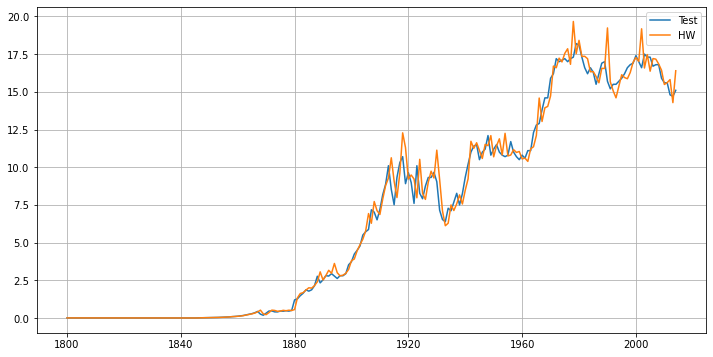

In [49]:
#Forecasted Data Line 
plt.figure(figsize=(12,6))
plt.plot(df2['CO2'], label='Test')
plt.plot(df2['Forecast'], label='HW')
plt.legend(loc='best')
plt.grid()
plt.show()

### Forecast for 10 years

In [50]:
future_dates_10 = [df2.index[-1] + DateOffset(years=x)for x in range(0,11)]
future_df_10 = pd.DataFrame(index=future_dates_10[1:],columns=df2.columns)
future_df_10 = future_df_10.drop(['Forecast'], axis = 'columns')
future_df_10.index.name = "Year"
future_df_10.shape

(10, 1)

In [51]:
#Predicting
next_10 = hw_model.forecast(10)
future_df_10['CO2']= np.exp(next_10)
#Printing the DF
future_df_10

,CO2
Year,
2015-01-01,14.976196
2016-01-01,14.791359
2017-01-01,13.854450
2018-01-01,13.587939
2019-01-01,13.803818
2020-01-01,13.701055
2021-01-01,13.266105
2022-01-01,12.820555
2023-01-01,12.722416


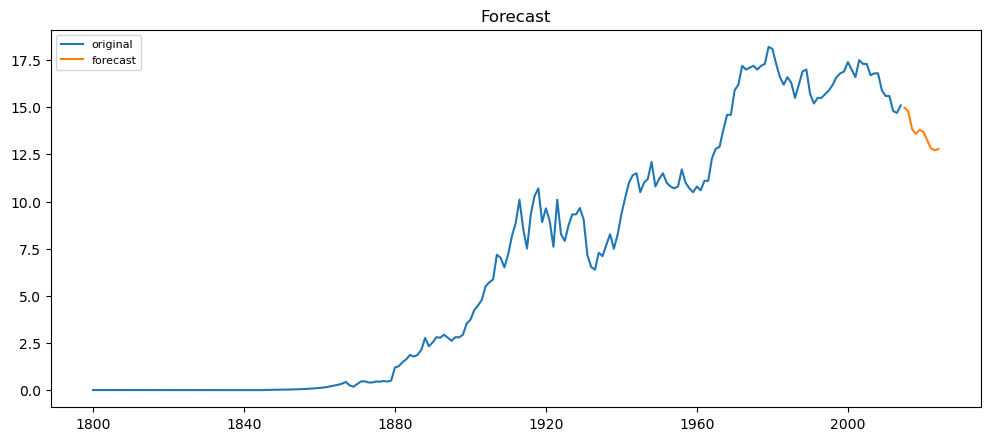

In [52]:
#Original Data
df3 = df2.drop(['Forecast'], axis='columns')
#Plotting the Forecasted Data of Next 10 Years
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df3, label='original')
#plt.plot(test, label='actual')
plt.plot(future_df_10['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()